# Importing data into Pandas

In [1]:
#importing pandas into python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataframe from csv to pandas
temp_data = pd.read_csv(r"C:\Users\NAMEERA\Desktop\2971606.csv",index_col='DATE')
temp_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-02,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,17.2,29.8,13.9
1983-01-04,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.6,NaN,14.8
1983-01-06,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.4,22.5,12.6
1983-01-07,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.2,22.3,15.5
1983-01-09,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,17.6,NaN,NaN


Importing a time series data set with the index column as the date would make it convenient to access specific fields. 

In [3]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62258 entries, 1983-01-02 to 2022-05-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    62258 non-null  object 
 1   NAME       62258 non-null  object 
 2   LATITUDE   62258 non-null  float64
 3   LONGITUDE  62258 non-null  float64
 4   ELEVATION  62258 non-null  float64
 5   PRCP       12145 non-null  float64
 6   TAVG       62258 non-null  float64
 7   TMAX       48418 non-null  float64
 8   TMIN       38382 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.7+ MB


# Data Exploratory Analysis

In [4]:
#Clean data for machine learning process
#inspect sum of NaN in each column
#ratio of missing values
temp_data.isnull().sum()/temp_data.shape[0]

STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.804925
TAVG         0.000000
TMAX         0.222301
TMIN         0.383501
dtype: float64

The precipitation column has the highest number of missing values followed by the minimum temperature for the day and the maximum temperature. 80% of the precipitation null values can be subsetted to view the rest of the data and make sense out of it. 

In [5]:
temp_data[pd.isnull(temp_data['PRCP'])]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-02,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,17.2,29.8,13.9
1983-01-04,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.6,NaN,14.8
1983-01-06,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.4,22.5,12.6
1983-01-07,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,19.2,22.3,15.5
1983-01-09,AEM00041217,"ABU DHABI INTERNATIONAL, AE",24.433,54.651,26.8,NaN,17.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-03,AE000041196,"SHARJAH INTER. AIRP, AE",25.333,55.517,34.0,NaN,29.2,NaN,NaN
2022-05-04,AE000041196,"SHARJAH INTER. AIRP, AE",25.333,55.517,34.0,NaN,28.5,NaN,NaN
2022-05-05,AE000041196,"SHARJAH INTER. AIRP, AE",25.333,55.517,34.0,NaN,29.3,NaN,NaN


In [6]:
temp_data.loc["1983-01-01",:]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-01,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.5,27.6,14.0
1983-01-01,AE000041196,"SHARJAH INTER. AIRP, AE",25.333,55.517,34.0,NaN,18.7,28.7,NaN


In [7]:
dubai_weather = temp_data[temp_data['NAME'].str.contains("DUBAI INTERNATIONAL, AE")]
dubai_weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-01,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.5,27.6,14.0
1983-01-02,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.8,30.2,13.4
1983-01-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.1,25.2,14.3
1983-01-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.4,23.5,15.8
1983-01-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,18.5,NaN,14.5
...,...,...,...,...,...,...,...,...,...
2022-05-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,29.1,NaN,NaN
2022-05-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,28.4,NaN,NaN
2022-05-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,30.0,NaN,NaN


In [8]:
dubai_weather.isnull().sum()/dubai_weather.shape[0]

STATION      0.000000
NAME         0.000000
LATITUDE     0.000000
LONGITUDE    0.000000
ELEVATION    0.000000
PRCP         0.553343
TAVG         0.000000
TMAX         0.206894
TMIN         0.347354
dtype: float64

In [9]:
dubai_weather[pd.isnull(dubai_weather['PRCP'])]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-01,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.5,27.6,14.0
1983-01-02,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.8,30.2,13.4
1983-01-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.1,25.2,14.3
1983-01-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,19.4,23.5,15.8
1983-01-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,18.5,NaN,14.5
...,...,...,...,...,...,...,...,...,...
2022-05-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,29.1,NaN,NaN
2022-05-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,28.4,NaN,NaN
2022-05-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,NaN,30.0,NaN,NaN


Given that the United Arab Emirates is a country with a predominantly higher temperature throughout, the chances of precipitation occuring in a year is approx. 6.84%. This occurrance is in short downpours and occassional thunder storms. Thus, the missing values can be assumed to be due to the lack of precipation year-round. 
The reason for this high ratio of missing values can also constitute to sensor malfunctions, human error or any legible reason as well. However, with the predomaninant climatic conditions of the region, it can be assumed that it is due to little to no precipitation. 

In [10]:
#Replacing missing values in PRCP with 0 
dubai_weather['PRCP'].value_counts()

0.0     6181
0.5       42
0.3       40
1.5       12
1.0       11
        ... 
10.7       1
30.0       1
26.9       1
15.5       1
14.7       1
Name: PRCP, Length: 67, dtype: int64

In [11]:
dubai_weather['PRCP']= dubai_weather['PRCP'].fillna(0)
dubai_weather

<ipython-input-11-97f348c441a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dubai_weather['PRCP']= dubai_weather['PRCP'].fillna(0)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-01,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.5,27.6,14.0
1983-01-02,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.8,30.2,13.4
1983-01-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.1,25.2,14.3
1983-01-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.4,23.5,15.8
1983-01-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,18.5,NaN,14.5
...,...,...,...,...,...,...,...,...,...
2022-05-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,29.1,NaN,NaN
2022-05-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,28.4,NaN,NaN
2022-05-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,30.0,NaN,NaN


In [12]:
#to check the missing values in TMIN and TMAX
dubai_weather[pd.isnull(dubai_weather['TMIN'])]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-07,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,18.7,23.5,NaN
1983-01-09,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,18.2,27.2,NaN
1983-01-16,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,16.2,22.9,NaN
1983-01-20,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,17.9,NaN,NaN
1983-01-21,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,16.6,19.1,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,29.1,NaN,NaN
2022-05-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,28.4,NaN,NaN
2022-05-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,30.0,NaN,NaN


Although the number of values missing for TMIN is not as much as PRCP, about 20% of the values are NaN. We could use the method of forward fill to fill in the values as an alternative. This method would insert values from the preceding field, presuming that the weather had followed a similar trend. 

In [13]:
dubai_weather = dubai_weather.fillna(method = 'ffill')
dubai_weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,
1983-01-01,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.5,27.6,14.0
1983-01-02,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.8,30.2,13.4
1983-01-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.1,25.2,14.3
1983-01-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,19.4,23.5,15.8
1983-01-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,18.5,23.5,14.5
...,...,...,...,...,...,...,...,...,...
2022-05-03,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,29.1,41.6,33.8
2022-05-04,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,28.4,41.6,33.8
2022-05-05,AEM00041194,"DUBAI INTERNATIONAL, AE",25.255,55.364,10.4,0.0,30.0,41.6,33.8


In [14]:
dubai_weather.apply(pd.isnull).sum()/dubai_weather.shape[0]

STATION      0.0
NAME         0.0
LATITUDE     0.0
LONGITUDE    0.0
ELEVATION    0.0
PRCP         0.0
TAVG         0.0
TMAX         0.0
TMIN         0.0
dtype: float64

In [15]:
core_dxb = dubai_weather[["PRCP","TMIN","TMAX"]].copy()

In [16]:
core_dxb.columns = ["precip","temp_min","temp_max"]
core_dxb

,precip,temp_min,temp_max
DATE,,,
1983-01-01,0.0,14.0,27.6
1983-01-02,0.0,13.4,30.2
1983-01-03,0.0,14.3,25.2
1983-01-04,0.0,15.8,23.5
1983-01-05,0.0,14.5,23.5
...,...,...,...
2022-05-03,0.0,33.8,41.6
2022-05-04,0.0,33.8,41.6
2022-05-05,0.0,33.8,41.6


In [17]:
core_dxb.dtypes

precip      float64
temp_min    float64
temp_max    float64
dtype: object

In [18]:
#checking index data type before machine learning process
core_dxb.index

Index(['1983-01-01', '1983-01-02', '1983-01-03', '1983-01-04', '1983-01-05',
       '1983-01-06', '1983-01-07', '1983-01-08', '1983-01-09', '1983-01-10',
       ...
       '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02',
       '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07'],
      dtype='object', name='DATE', length=14360)

In [19]:
#converting object dtype to datetime index
core_dxb.index = pd.to_datetime(core_dxb.index)

In [20]:
core_dxb.index

DatetimeIndex(['1983-01-01', '1983-01-02', '1983-01-03', '1983-01-04',
               '1983-01-05', '1983-01-06', '1983-01-07', '1983-01-08',
               '1983-01-09', '1983-01-10',
               ...
               '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01',
               '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-07'],
              dtype='datetime64[ns]', name='DATE', length=14360, freq=None)

The documentation supplied has mentioned that any field that consists of the value 9999 indicates missing values. Rectifying the discrepancy before getting ahead with the machine learning process would be feasible. 

In [21]:
#using lambda to check for 9999 in all fields
core_dxb.apply(lambda x: (x==9999).sum())

precip      0
temp_min    0
temp_max    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

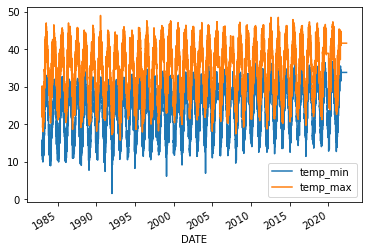

In [22]:
#plotting weather data 
core_dxb[['temp_min','temp_max']].plot()

The trend for minimum temperature has had a substantial increase throughout these 3.5 decades. There does seem to be an outlier indicated between the time frame of 1990 and 1995 which can be looked into further on into the analysis. 

In [23]:
#To check if there are any missing readings 
core_dxb.index.year.value_counts()

1984    366
1992    366
2012    366
2004    366
1996    366
1988    366
2000    366
2016    366
2008    366
2007    365
1983    365
2014    365
1998    365
1990    365
2013    365
2005    365
1997    365
1989    365
2020    365
2001    365
1993    365
1985    365
2010    365
2009    365
2017    365
1986    365
1994    365
2019    365
2002    365
1987    365
1995    365
2003    365
2011    365
2015    365
2018    364
2006    364
1999    364
2021    361
1991    361
2022    127
Name: DATE, dtype: int64

Following the previous analysis on missing values for precipitation, we can plot a graph to visualise the frequency of rainfall in Dubai.

<AxesSubplot:xlabel='DATE'>

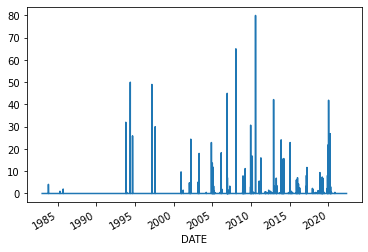

In [24]:
core_dxb['precip'].plot()

In [25]:
core_dxb.apply(lambda x: (x!=0).sum())

precip        233
temp_min    14360
temp_max    14360
dtype: int64

Number of days Dubai has faced precipitation in the past amounts to 233 while the frequency has had an increase during the past decade.

In [26]:
core_dxb.groupby(core_dxb.index.year).sum()['precip']

DATE
1983      4.1
1984      0.0
1985      3.0
1986      0.0
1987      0.0
1988      0.0
1989      0.0
1990      0.0
1991      0.0
1992      0.0
1993     32.5
1994     99.8
1995      0.0
1996      0.0
1997     79.0
1998      0.0
1999      0.0
2000      9.7
2001      2.5
2002     30.7
2003     35.7
2004     58.7
2005     23.8
2006    103.7
2007      7.6
2008    135.7
2009    101.1
2010    122.7
2011     25.6
2012     52.2
2013     55.4
2014     59.3
2015     32.2
2016     15.9
2017     32.3
2018     22.5
2019     73.8
2020    150.9
2021      0.0
2022      0.0
Name: precip, dtype: float64

There seems to be an inconsistency in the statistics for precipation in Dubai. According to research, the average number of days for precipitation in the city is about 25 days per annum, however, the data at hand exhibits few outliers. 
- The year 2020 is shown to have faced 150 days of some form of precipitation which is proved to be false by external statistics. 

The question that arises through this analysis is, how much would this inconsistency affect the machine learning model to predict weather patterns of the future. 

# Machine Learning Model Analysis

In [27]:
#predicting the next day's maximum temperature
core_dxb['target'] = core_dxb.shift(-1)['temp_max']
core_dxb

,precip,temp_min,temp_max,target
DATE,,,,
1983-01-01,0.0,14.0,27.6,30.2
1983-01-02,0.0,13.4,30.2,25.2
1983-01-03,0.0,14.3,25.2,23.5
1983-01-04,0.0,15.8,23.5,23.5
1983-01-05,0.0,14.5,23.5,23.6
...,...,...,...,...
2022-05-03,0.0,33.8,41.6,41.6
2022-05-04,0.0,33.8,41.6,41.6
2022-05-05,0.0,33.8,41.6,41.6


The final value in the target column is NaN since the data to predicted is of that particular day and henceforth and there is no data to pull back from and use as a target. Thus dropping the row for 7th of May,2022. 

In [28]:
core_dxb = core_dxb.iloc[:-1,:].copy()

In [29]:
core_dxb

,precip,temp_min,temp_max,target
DATE,,,,
1983-01-01,0.0,14.0,27.6,30.2
1983-01-02,0.0,13.4,30.2,25.2
1983-01-03,0.0,14.3,25.2,23.5
1983-01-04,0.0,15.8,23.5,23.5
1983-01-05,0.0,14.5,23.5,23.6
...,...,...,...,...
2022-05-02,0.0,33.8,41.6,41.6
2022-05-03,0.0,33.8,41.6,41.6
2022-05-04,0.0,33.8,41.6,41.6


In [30]:
#import scikit-learn module for ML process
from sklearn.linear_model import Ridge

In [31]:
X = core_dxb.drop('target',axis=1)
y = core_dxb['target'].values

When a data set is large, it has the tendency to overfit during the modelling process. These large coefficients can be regularised; AKA penalising the coefficients according to said requirements. 

There are two methods to consider regularisation:
- Lasso Regression
- Ridge Regression

For the given problem, the number of features are 3, hence, Ridge regression model would be favourable. Picking an alpha value solely depends on experimentation. However, we do know that the alpha = 0 signifies overfitting, whereas alpha >> generates an underfitted model. 

In [32]:
#splitting data using train-test-split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 21)

In [33]:
from sklearn.model_selection import cross_val_score
#create a ridge regressor 
ridge = Ridge(normalize = True,alpha = 10)

In [34]:
alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_scores_std = []

#to find an optimum alpha value for the model
for alpha in alpha_space:
    #specify the alpha value to use
    ridge.alpha = alpha
    
    #perform 10-fold cv: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
    

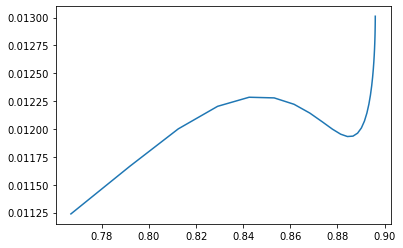

In [35]:
plt.plot(ridge_scores,ridge_scores_std)
plt.xlabel
plt.show()

In [36]:
 ridge_cv_scores

array([0.76810382, 0.76619485, 0.74950751, 0.76196066, 0.75408806,
       0.75868412, 0.76797733, 0.77604118, 0.78985602, 0.77642328])

In [37]:
ridge.fit(X_train,y_train)

Ridge(normalize=True)

In [38]:
y_pred = ridge.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mean_absolute_error(y_test,y_pred)

2.659220250611063

The mean absolute error indicates that the prediction has had an offset of 5.11 deg on average. The accuracy can be improved using various methods. Eg: Using a better model or fine tuning the regularising coefficients.

In [41]:
#prediction comparison
y_series = pd.Series(y_pred)

In [42]:
y_test_series = pd.Series(y_test)

In [43]:
combined = pd.concat([y_test_series,y_series],axis=1)

In [44]:
combined.columns = ["Actual","Predictions"]

In [45]:
y_pred_df = pd.DataFrame({'prediction':y_pred},index = X_test.index)

In [46]:
y_pred_df

,prediction
DATE,
2012-12-06,31.887045
2011-03-29,29.812916
1999-09-11,38.509695
1985-05-13,35.320306
2011-03-09,31.417251
...,...
1995-05-13,35.146932
2010-06-19,40.660427
2000-06-17,36.446446


In [48]:
y_test_df = pd.DataFrame({'actual':y_test}, index = X_test.index)
y_test_df

,actual
DATE,
2012-12-06,29.0
2011-03-29,29.4
1999-09-11,40.9
1985-05-13,33.5
2011-03-09,30.6
...,...
1995-05-13,35.9
2010-06-19,43.4
2000-06-17,35.2


In [52]:
dfs= [y_pred_df,y_test_df]

In [53]:
combined = pd.concat(dfs,axis=1)

In [54]:
combined

,prediction,actual
DATE,,
2012-12-06,31.887045,29.0
2011-03-29,29.812916,29.4
1999-09-11,38.509695,40.9
1985-05-13,35.320306,33.5
2011-03-09,31.417251,30.6
...,...,...
1995-05-13,35.146932,35.9
2010-06-19,40.660427,43.4
2000-06-17,36.446446,35.2


<AxesSubplot:xlabel='DATE'>

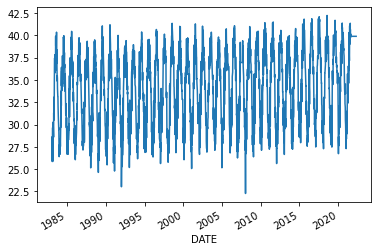

In [56]:
combined['prediction'].plot()

<AxesSubplot:xlabel='DATE'>

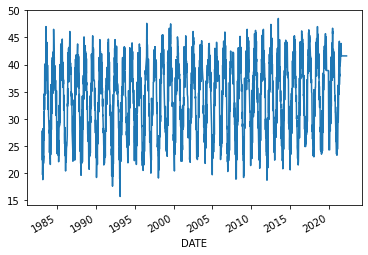

In [57]:
combined['actual'].plot()

Although the prediction is decent enough, the actual temperature consists of outliers over 45 degrees, while the predictions lie within 42 degrees Celsius.

In [58]:
ridge.coef_

array([-0.04729048,  0.31048277,  0.34674922])

This implies that the precipitation has an infinitesimal negative effect on the predicted temperatures whilst obvious implications of maximum temperature for the following day. 